In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from s1isp.descriptors import PVTAncillaryData
from s1isp.decoder import SubCommutatedDataDecoder, SubCommItem

In [4]:
import pickle

In [5]:
filename = "data/subcom-data.pkl"
with open(filename, "rb") as fd:
    subcomm_data = pickle.load(fd)

In [6]:
subcomm_data = [SubCommItem(*item) for item in subcomm_data]

In [7]:
decoder = SubCommutatedDataDecoder()

In [8]:
decoded_data = decoder.decode(subcomm_data)

Incomplete sub-commutated data cycle: 15
Incomplete sub-commutated data cycle: 46
Incomplete sub-commutated data cycle: 77
Incomplete sub-commutated data cycle: 108
Incomplete sub-commutated data cycle: 139
Incomplete sub-commutated data cycle: 170
Incomplete sub-commutated data cycle: 201
Incomplete sub-commutated data cycle: 232
Incomplete sub-commutated data cycle: 263
Incomplete sub-commutated data cycle: 294
Incomplete sub-commutated data cycle: 325
Incomplete sub-commutated data cycle: 356
Incomplete sub-commutated data cycle: 387
Incomplete sub-commutated data cycle: 418
Incomplete sub-commutated data cycle: 449
Incomplete sub-commutated data cycle: 480
Incomplete sub-commutated data cycle: 511
Incomplete sub-commutated data cycle: 542
Incomplete sub-commutated data cycle: 573
Incomplete sub-commutated data cycle: 604
Incomplete sub-commutated data cycle: 635
Incomplete sub-commutated data cycle: 666
Incomplete sub-commutated data cycle: 697
Incomplete sub-commutated data cycle:

In [9]:
incomplete_cycle_data = {
    idx: item for idx, item in enumerate(decoder._cycle_data) if not item.is_complete()
}

In [10]:
import numpy as np

N = len(decoded_data)
t = np.zeros(N, dtype=float)
p = np.zeros([3, N], dtype=float)
v = np.zeros([3, N], dtype=float)

for idx, item in enumerate(decoded_data):
    pvt: PVTAncillaryData = item.pvt
    t[idx] = pvt.time_stamp
    p[:, idx] = pvt.x, pvt.y, pvt.z
    v[:, idx] = pvt.vx, pvt.vy, pvt.vz

t /= 2**24

In [11]:
%matplotlib inline

In [12]:
from matplotlib import pyplot as plt

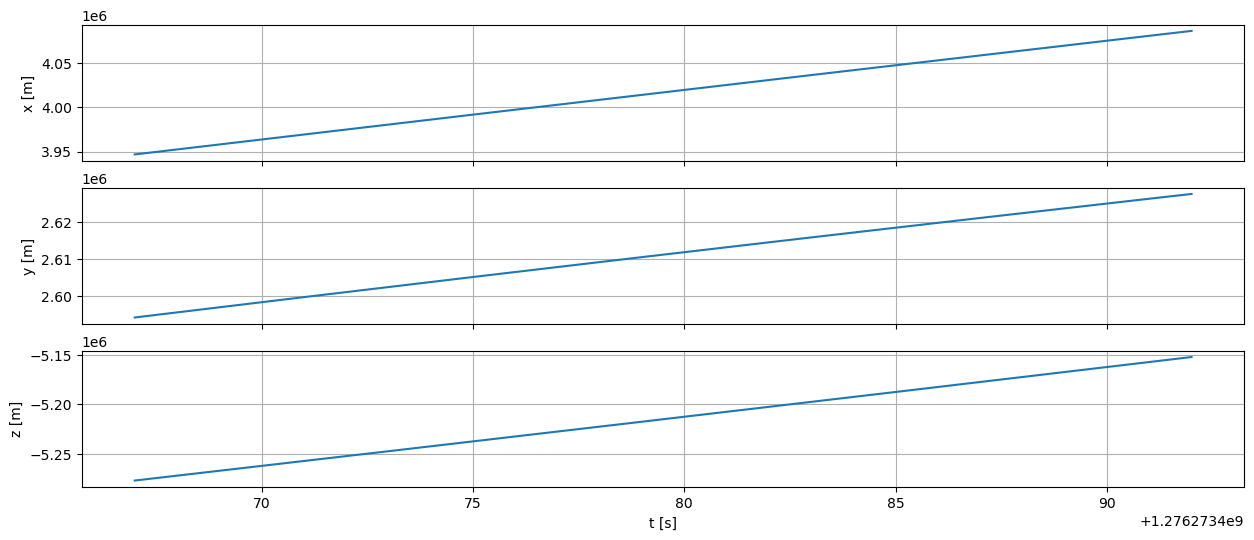

In [13]:
fig, ax = plt.subplots(3, sharex=True, figsize=[15, 6])

ax[0].plot(t, p[0, :], label='x')
ax[0].grid()
ax[0].set_ylabel("x [m]")

ax[1].plot(t, p[1, :], label='y')
ax[1].grid()
ax[1].set_ylabel("y [m]")

ax[2].plot(t, p[2, :], label='z')
ax[2].grid()
ax[2].set_ylabel("z [m]")
ax[2].set_xlabel("t [s]");